In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats
from scipy.stats import t
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
import openpyxl

In [3]:
df = pd.read_excel(r'C:\Users\raucc\OneDrive\Documents\MA 544\NBA GameData.xlsx')
df

,Date,Start Time (ET),Visitor,Visitor PTS,Home,Home PTS,TOTAL PTS,MARGIN,Attendance,Visitor AGE,...,Visitor OpORB,Home OpORB,Visitor OpTRB,Home OpTRB,Visitor OpSTL,Home OpSTL,Visitor OpTOV,Home OpTOV,Visitor OpPF,Home OpPF
0,Tue Oct 18 2022,7:30p,Philadelphia 76ers,117,Boston Celtics,126,243,-9,19156.0,28.2,...,0.781,0.769,31.6,34.3,24.2,23.1,4.6,3.9,19.6,19.1
1,Tue Oct 18 2022,10:00p,Los Angeles Lakers,109,Golden State Warriors,123,232,-14,18064.0,27.9,...,0.773,0.769,33.8,32.6,25.7,25.7,5.1,4.0,21.5,18.4
2,Wed Oct 19 2022,7:00p,Orlando Magic,109,Detroit Pistons,113,222,-4,20190.0,23.1,...,0.796,0.777,32.5,33.7,25.9,25.8,5.1,5.5,20.5,21.0
3,Wed Oct 19 2022,7:00p,Washington Wizards,114,Indiana Pacers,107,221,7,15027.0,26.2,...,0.798,0.800,32.3,33.2,24.8,26.4,5.0,5.3,19.4,20.2
4,Wed Oct 19 2022,7:30p,Houston Rockets,107,Atlanta Hawks,117,224,-10,17878.0,22.1,...,0.794,0.803,31.0,33.5,26.1,26.0,6.2,5.0,20.6,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,Thu Jun 4 2009,9:00p,Orlando Magic,75,Los Angeles Lakers,100,175,-25,18997.0,27.3,...,0.715,0.770,33.3,31.5,19.4,23.3,5.4,5.1,20.3,20.7
19142,Sun Jun 7 2009,8:00p,Orlando Magic,96,Los Angeles Lakers,101,197,-5,18997.0,27.3,...,0.715,0.770,33.3,31.5,19.4,23.3,5.4,5.1,20.3,20.7
19143,Tue Jun 9 2009,9:00p,Los Angeles Lakers,104,Orlando Magic,108,212,-4,17461.0,27.4,...,0.770,0.715,31.5,33.3,23.3,19.4,5.1,5.4,20.7,20.3
19144,Thu Jun 11 2009,9:00p,Los Angeles Lakers,99,Orlando Magic,91,190,8,17461.0,27.4,...,0.770,0.715,31.5,33.3,23.3,19.4,5.1,5.4,20.7,20.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             19146 non-null  object 
 1   Start Time (ET)  19146 non-null  object 
 2   Visitor          19146 non-null  object 
 3   Visitor PTS      19146 non-null  int64  
 4   Home             19146 non-null  object 
 5   Home PTS         19146 non-null  int64  
 6   TOTAL PTS        19146 non-null  int64  
 7   MARGIN           19146 non-null  int64  
 8   Attendance       18961 non-null  float64
 9   Visitor AGE      19146 non-null  float64
 10  Home AGE         19146 non-null  float64
 11  Visitor SRS      19146 non-null  float64
 12  Home SRS         19146 non-null  float64
 13  Visitor OffRtg   19146 non-null  float64
 14  Home OffRtg      19146 non-null  float64
 15  Visitor DefRtg   19146 non-null  float64
 16  Home DefRtg      19146 non-null  float64
 17  Visitor NetR

In [5]:
#check percentage of missing values for each column
(df.isnull().sum().sort_values(ascending=False)/len(df))*100

Attendance         0.966259
Date               0.000000
Visitor ORB        0.000000
Home PF            0.000000
Visitor PF         0.000000
                     ...   
Visitor OTOVPer    0.000000
Home OEFGPer       0.000000
Visitor OEFGPer    0.000000
Home TSPer         0.000000
Home OpPF          0.000000
Length: 91, dtype: float64

In [6]:
#Drop non-numeric variables
df.drop('Date', axis=1, inplace=True)
df.drop('Start Time (ET)', axis=1, inplace=True)
df.drop('Visitor', axis=1, inplace=True)
df.drop('Home', axis=1, inplace=True)
# Missing values in attendance due to games being played in 2020 COVID-19 pandemic
df.drop('Attendance', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Visitor PTS      19146 non-null  int64  
 1   Home PTS         19146 non-null  int64  
 2   TOTAL PTS        19146 non-null  int64  
 3   MARGIN           19146 non-null  int64  
 4   Visitor AGE      19146 non-null  float64
 5   Home AGE         19146 non-null  float64
 6   Visitor SRS      19146 non-null  float64
 7   Home SRS         19146 non-null  float64
 8   Visitor OffRtg   19146 non-null  float64
 9   Home OffRtg      19146 non-null  float64
 10  Visitor DefRtg   19146 non-null  float64
 11  Home DefRtg      19146 non-null  float64
 12  Visitor NetRtg   19146 non-null  float64
 13  Home NetRtg      19146 non-null  float64
 14  Visitor PACE     19146 non-null  float64
 15  Home PACE        19146 non-null  float64
 16  Visitor FTR      19146 non-null  float64
 17  Home FTR    

In [8]:
# Standardize the features before applying PCA
features = df.columns[3:]  
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

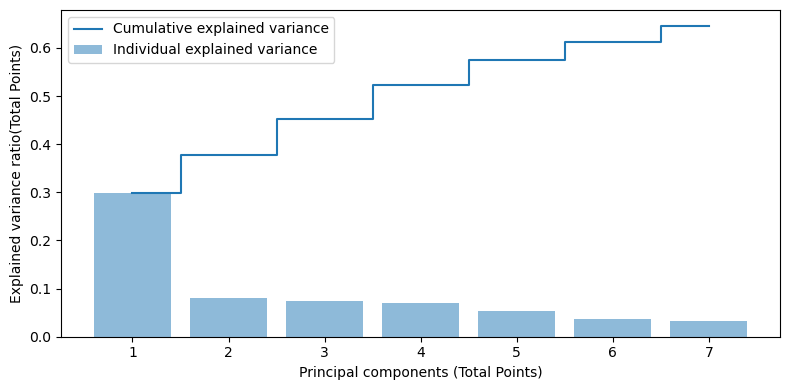

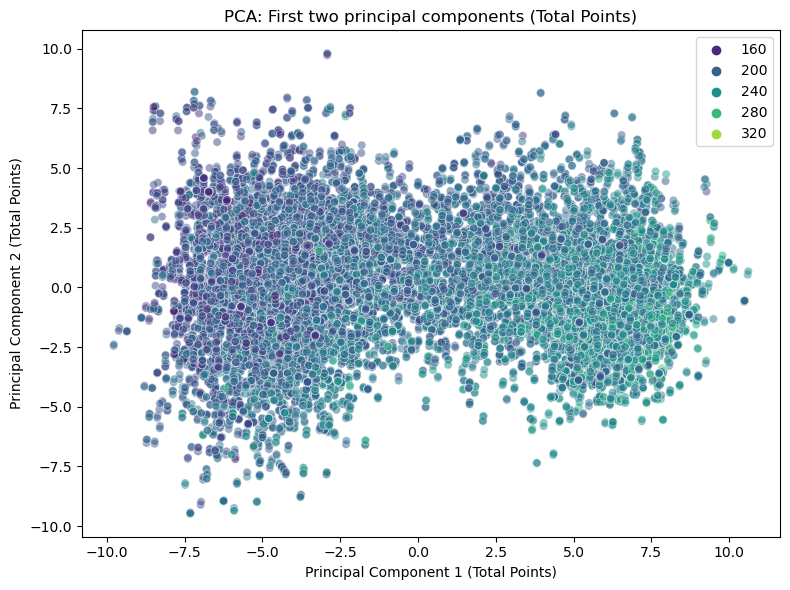

In [9]:
# Combine the principal components with the target variable
finalDf1 = pd.concat([principalDf, df[['TOTAL PTS']]], axis=1)

# Explained variance plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio(Total Points)')
plt.xlabel('Principal components (Total Points)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='TOTAL PTS', data=finalDf1, palette='viridis', alpha=0.5)
plt.title('PCA: First two principal components (Total Points)')
plt.xlabel('Principal Component 1 (Total Points)')
plt.ylabel('Principal Component 2 (Total Points)')
plt.legend()
plt.tight_layout()
plt.show()


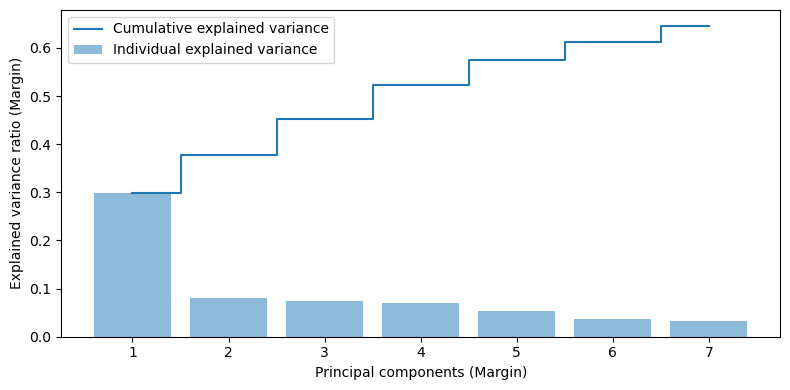

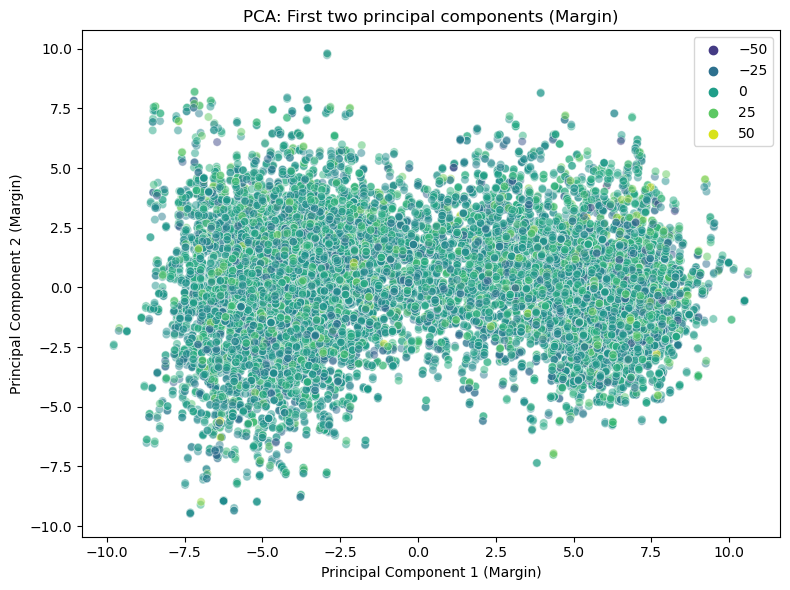

In [10]:
# Combine the principal components with the target variable
finalDf2 = pd.concat([principalDf, df[['MARGIN']]], axis=1)

# Explained variance plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio (Margin)')
plt.xlabel('Principal components (Margin)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='MARGIN', data=finalDf2, palette='viridis', alpha=0.5)
plt.title('PCA: First two principal components (Margin)')
plt.xlabel('Principal Component 1 (Margin)')
plt.ylabel('Principal Component 2 (Margin)')
plt.legend()
plt.tight_layout()
plt.show()


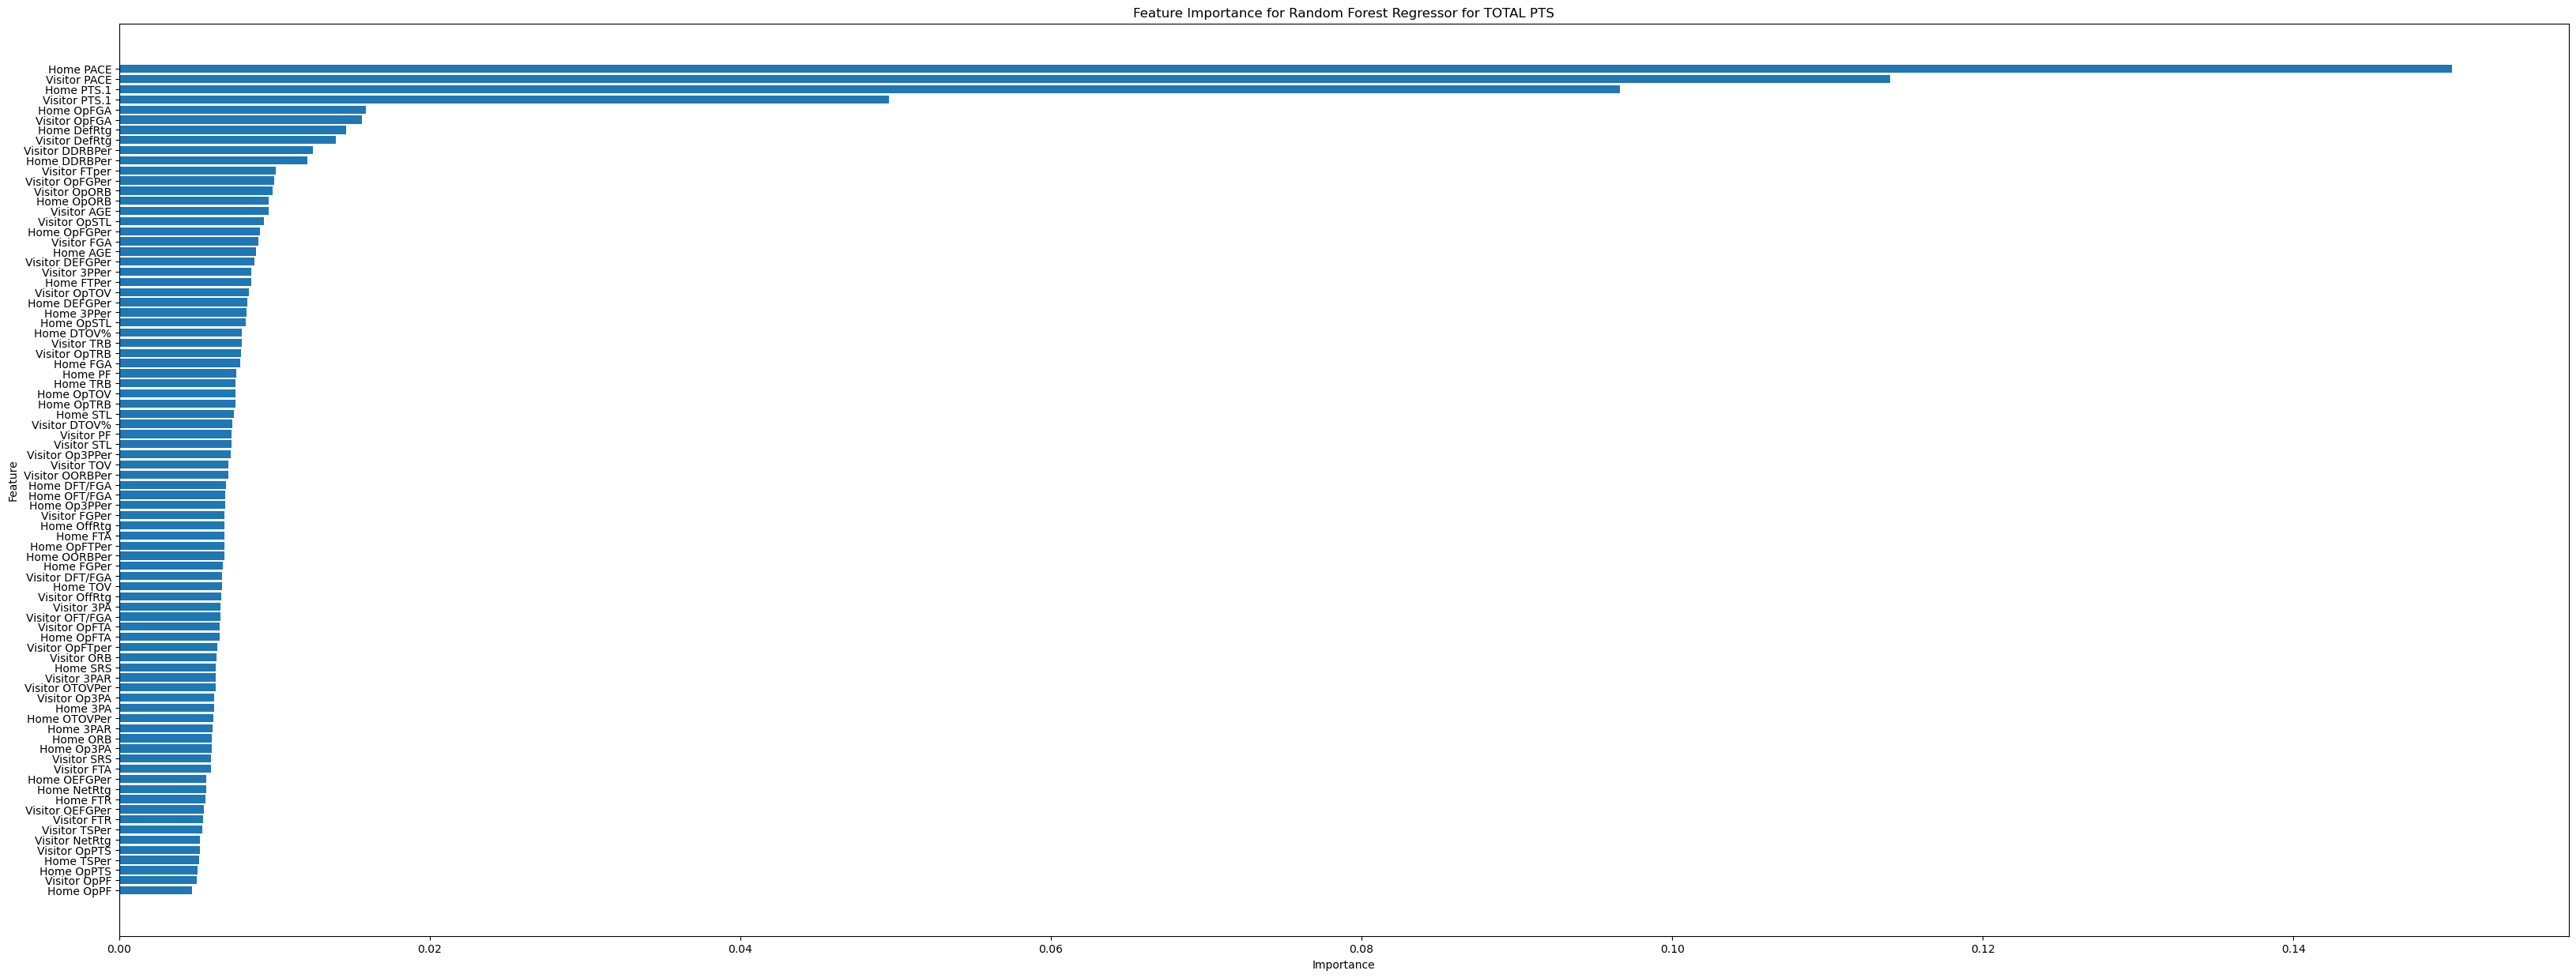

In [20]:
X1 = df.drop(['TOTAL PTS','MARGIN', 'Home PTS', 'Visitor PTS'], axis=1)
y1 = df['TOTAL PTS']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor1.fit(X_train1, y_train1)

# Get feature importances
importances1 = rf_regressor1.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df1 = pd.DataFrame({'feature': X1.columns, 'importance': importances1})

# Sort the DataFrame to find the most important features
feature_importance_df1 = feature_importance_df1.sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(40, 15))
plt.barh(feature_importance_df1['feature'], feature_importance_df1['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor for TOTAL PTS')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(rf_regressor1, X_train1, y_train1, cv=10, scoring='neg_mean_squared_error', n_jobs=4)
print('Cross validation scores:', scores1)
print('Mean cross validation score:', scores1.mean())
std_score1 = np.std(scores1)
print(f'Standard deviation: {std_score1:.2f}')

Cross validation scores: [-374.2842577  -377.06339874 -395.03183493 -382.24762665 -386.95105155
 -369.9992691  -383.65354302 -388.47342639 -372.61004445 -396.09640544]
Mean cross validation score: -382.641085797254
Standard deviation: 8.66


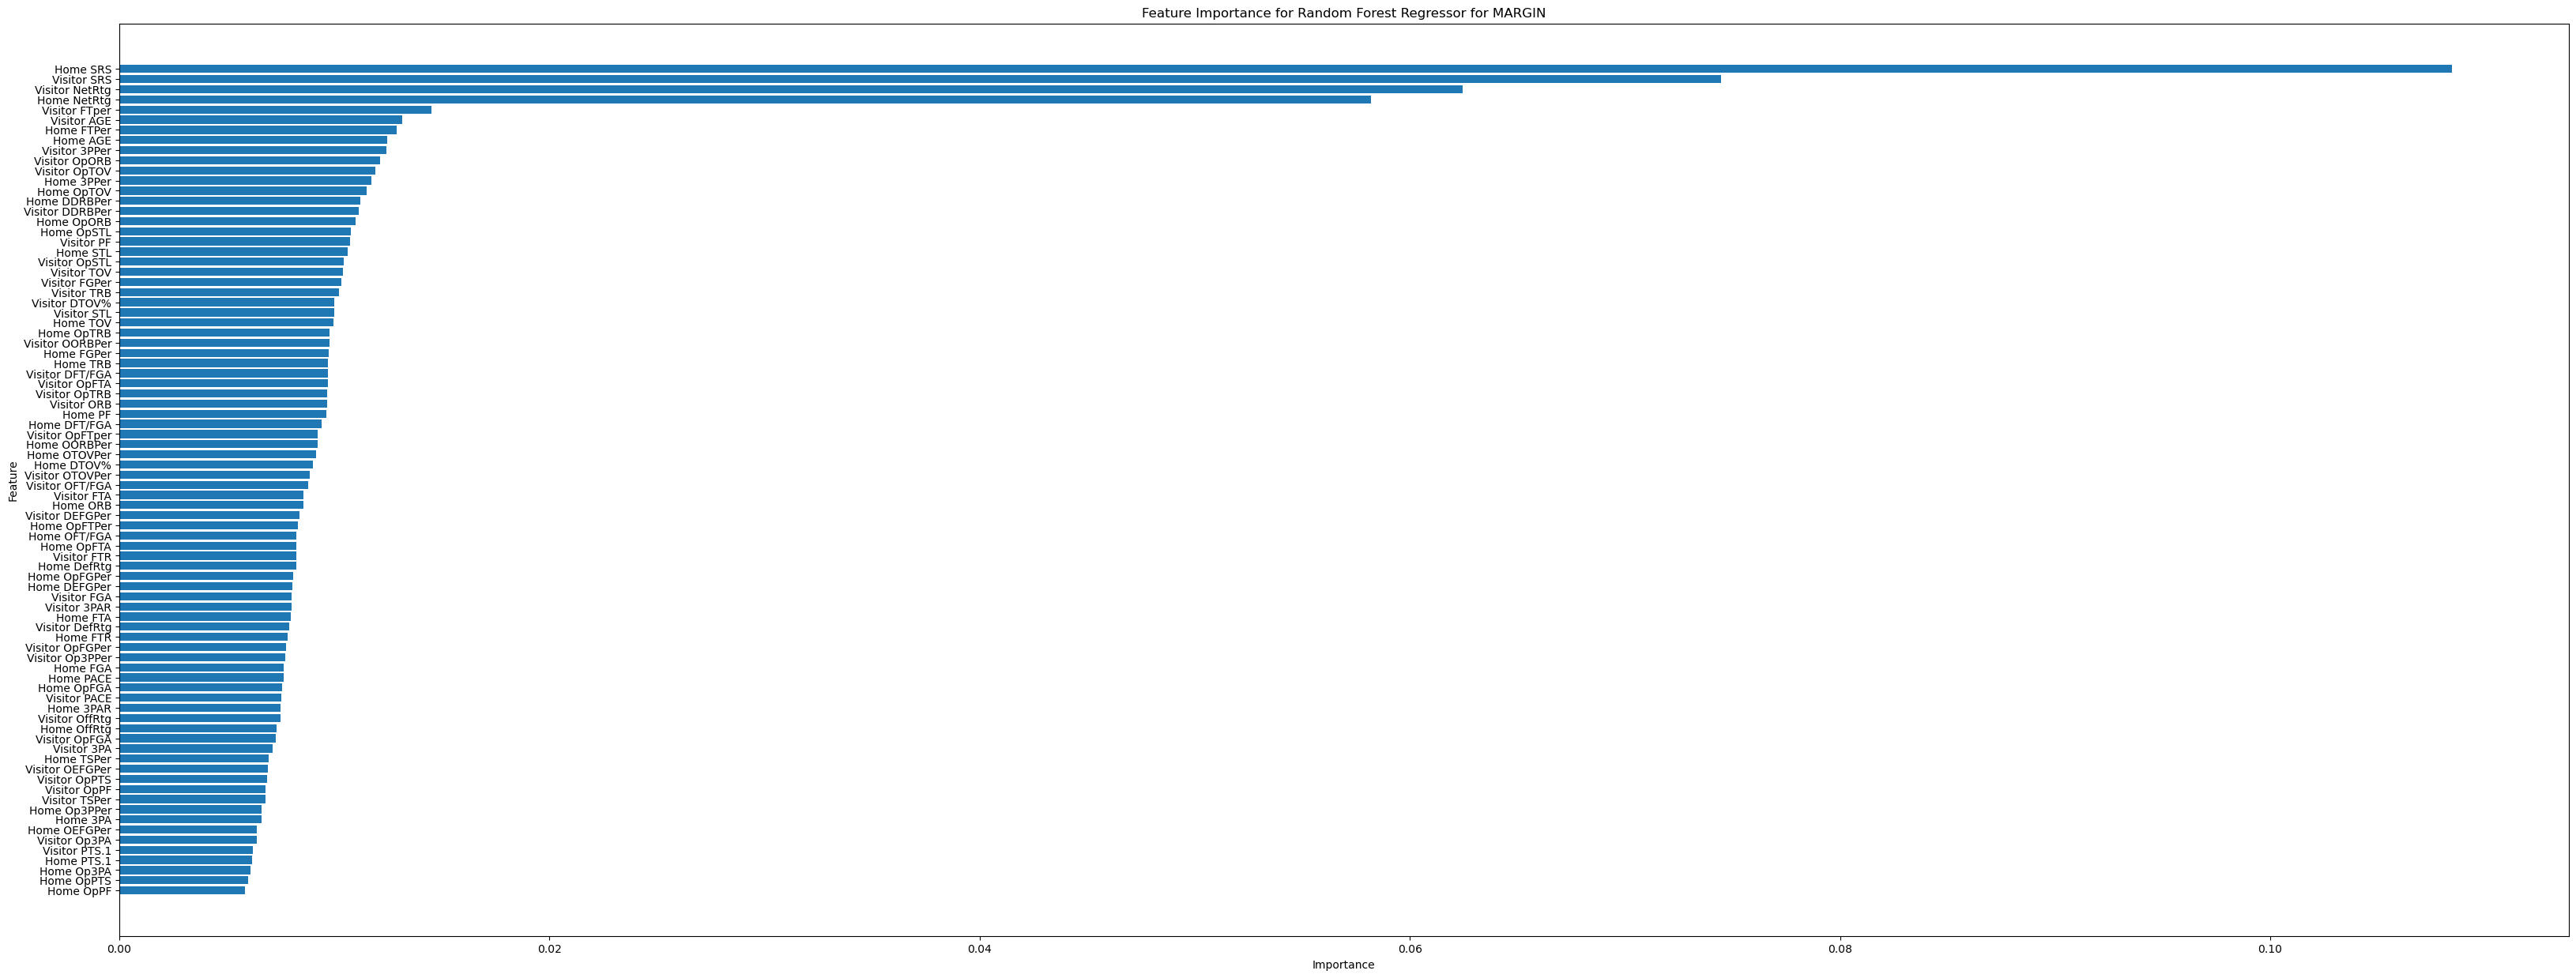

In [22]:
X2 = df.drop(['TOTAL PTS','MARGIN', 'Home PTS', 'Visitor PTS'], axis=1)
y2 = df['MARGIN']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor2.fit(X_train2, y_train2)

# Get feature importances
importances2 = rf_regressor2.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df2 = pd.DataFrame({'feature': X2.columns, 'importance': importances2})

# Sort the DataFrame to find the most important features
feature_importance_df2 = feature_importance_df2.sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(40, 15))
plt.barh(feature_importance_df2['feature'], feature_importance_df2['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor for MARGIN')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [23]:
scores2 = cross_val_score(rf_regressor2, X_train2, y_train2, cv=10, scoring='neg_mean_squared_error', n_jobs=4)
print('Cross validation scores:', scores2)
print('Mean cross validation score:', scores2.mean())
std_score2 = np.std(scores2)
print(f'Standard deviation: {std_score2:.2f}')

Cross validation scores: [-201.10787679 -181.54384886 -185.30155195 -210.42234855 -191.22918568
 -177.56034835 -195.78142036 -192.25786822 -178.98985387 -171.69577791]
Mean cross validation score: -188.58900805469438
Standard deviation: 11.25


In [11]:
def linear_regression(X, y):
    # Fit the model
    model = LinearRegression().fit(X, y)
    
    # Calculate the metrics
    n = X.shape[0]
    p = X.shape[1]
    y_hat = model.predict(X)
    SST = np.sum((y - np.mean(y)) ** 2)
    SSE = np.sum((y - y_hat) ** 2)
    SSR = np.sum((y_hat - np.mean(y)) ** 2)
    R2 = SSR / SST
    std_err = np.sqrt(SSE / (n - p - 1))
    F = (SSR / p) / (SSE / (n - p - 1))
    p_values = [1 - stats.f.cdf(F, 1, n - p - 1) for i in range(p)]
    intercept = model.intercept_
    coefficients = model.coef_
    mse = mean_squared_error(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y, y_hat)
    # Format the p-values in scientific notation
    p_values_scientific = [f"{p:.2e}" for p in p_values]
    
    # Print the metrics
    print(f"Multiple R: {np.sqrt(R2):.4f}")
    print(f"R Square: {R2:.4f}")
    print(f"Standard Error: {std_err:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f'R-squared: {R2:.2f}')
    print(f'Mean squared error: {mse:.2f}')
    print(f'Mean absolute error: {mae:.2f}')
    print(f'Root mean squared error: {rmse:.2f}')
    print(f'Mean absolute percentage error: {mape:.2f}')
    # Get the feature names from the X dataframe
    feature_names = X.columns
    for i in range(p):
        # Print the coefficient and p-value for each feature name
        print(f"Coefficient for {feature_names[i]}: {coefficients[i]}")


In [12]:
linear_regression(df[['Home PACE', 'Home PTS.1', 'Home OpFGA', 'Home DefRtg', 'Home DDRBPer', 'Home OpORB', 'Home AGE',
                      'Visitor PACE', 'Visitor PTS.1', 'Visitor OpFGA', 'Visitor DefRtg', 'Visitor DDRBPer', 'Visitor OpORB',
                    'Visitor AGE']] , df['TOTAL PTS'])

Multiple R: 0.6170
R Square: 0.3807
Standard Error: 17.9994
Intercept: -46.0903
R-squared: 0.38
Mean squared error: 323.72
Mean absolute error: 14.17
Root mean squared error: 17.99
Mean absolute percentage error: 0.07
Coefficient for Home PACE: 0.8381719261198791
Coefficient for Home PTS.1: 0.6587752985491169
Coefficient for Home OpFGA: 0.15405111565301213
Coefficient for Home DefRtg: 0.39946308217518783
Coefficient for Home DDRBPer: -0.8424586765184616
Coefficient for Home OpORB: 8.441695745408184
Coefficient for Home AGE: 0.04409015492253423
Coefficient for Visitor PACE: 1.0415073818494454
Coefficient for Visitor PTS.1: 0.4716241488806215
Coefficient for Visitor OpFGA: 0.29278419243119536
Coefficient for Visitor DefRtg: 0.3281648483660496
Coefficient for Visitor DDRBPer: -0.9111657046668146
Coefficient for Visitor OpORB: -16.2312654151235
Coefficient for Visitor AGE: -0.08111209610602928


In [13]:
# Define the intercept and coefficients as a dictionary
interceptTP = -46.0903
coefficientsTP = {
 "Home PACE": 0.8381719261198791,
 "Home PTS.1": 0.6587752985491169,
 "Home OpFGA": 0.15405111565301213,
 "Home DefRtg": 0.39946308217518783,
 "Home DDRBPer": -0.8424586765184616,
 "Home OpORB": 8.441695745408184,
 "Home AGE": 0.04409015492253423,
 "Visitor PACE": 1.0415073818494454,
 "Visitor PTS.1": 0.4716241488806215,
 "Visitor OpFGA": 0.29278419243119536,
"Visitor DefRtg": 0.3281648483660496,
 "Visitor DDRBPer": -0.9111657046668146,
 "Visitor OpORB": -16.2312654151235,
 "Visitor AGE": -0.08111209610602928
}

In [14]:
#Initialize selected team statistcs as variables
wb = openpyxl.load_workbook(r'C:\Users\raucc\OneDrive\Documents\MA 544\NBA GameData.xlsx')
# Get the sheet by name
sheet = wb["TOTAL"]
# Set the variable to be a list of cell values in that row
Hawkstp = [cell.value for cell in sheet[2]]
Celticstp = [cell.value for cell in sheet[3]]
Netstp = [cell.value for cell in sheet[4]]
Hornetstp = [cell.value for cell in sheet[5]]
Bullstp = [cell.value for cell in sheet[6]]
Cavalierstp = [cell.value for cell in sheet[7]]
Maverickstp = [cell.value for cell in sheet[8]]
Nuggetstp = [cell.value for cell in sheet[9]]
Pistonstp = [cell.value for cell in sheet[10]]
Warriorstp = [cell.value for cell in sheet[11]]
Rocketstp = [cell.value for cell in sheet[12]]
Pacerstp = [cell.value for cell in sheet[13]]
Clipperstp = [cell.value for cell in sheet[14]]
Lakerstp = [cell.value for cell in sheet[15]]
Grizzliestp = [cell.value for cell in sheet[16]]
Heattp = [cell.value for cell in sheet[17]]
Buckstp = [cell.value for cell in sheet[18]]
Timberwolvestp = [cell.value for cell in sheet[19]]
Pelicanstp = [cell.value for cell in sheet[20]]
Knickstp = [cell.value for cell in sheet[21]]
Thundertp = [cell.value for cell in sheet[22]]
Magictp = [cell.value for cell in sheet[23]]
Sixerstp = [cell.value for cell in sheet[24]]
Sunstp = [cell.value for cell in sheet[25]]
Trail_Blazerstp = [cell.value for cell in sheet[26]]
Kingstp = [cell.value for cell in sheet[27]]
Spurstp = [cell.value for cell in sheet[28]]
Raptorstp = [cell.value for cell in sheet[29]]
Jazztp = [cell.value for cell in sheet[30]]
Wizardstp = [cell.value for cell in sheet[31]]

In [15]:
linear_regression(df[['Home SRS', 'Home NetRtg', 'Home FTPer', 'Home AGE', 'Home 3PPer', 'Home OpTOV', 'Home OpORB', 
                     'Home DDRBPer', 'Home OpSTL', 'Visitor SRS', 'Visitor NetRtg', 'Visitor FTper', 'Visitor AGE', 
                     'Visitor 3PPer', 'Visitor OpTOV', 'Visitor OpORB', 'Visitor DDRBPer', 'Visitor OpSTL']] , df['MARGIN'])

Multiple R: 0.4641
R Square: 0.2154
Standard Error: 12.1864
Intercept: -14.5032
R-squared: 0.22
Mean squared error: 148.36
Mean absolute error: 9.54
Root mean squared error: 12.18
Mean absolute percentage error: 1.14
Coefficient for Home SRS: -1.3277008896981048
Coefficient for Home NetRtg: 0.21520435129992851
Coefficient for Home FTPer: 4.061553432581246
Coefficient for Home AGE: 0.0329481722675496
Coefficient for Home 3PPer: -4.524530297992499
Coefficient for Home OpTOV: -0.18052239802746362
Coefficient for Home OpORB: -4.523839554655335
Coefficient for Home DDRBPer: 0.07119029159861262
Coefficient for Home OpSTL: 0.01421484723346383
Coefficient for Visitor SRS: 0.7485214937486097
Coefficient for Visitor NetRtg: 0.1359226464361696
Coefficient for Visitor FTper: 5.935402815553223
Coefficient for Visitor AGE: 0.10042473611649307
Coefficient for Visitor 3PPer: -1.1528444569564396
Coefficient for Visitor OpTOV: -0.15707845923035493
Coefficient for Visitor OpORB: -5.430750824775395
Coeffi

In [16]:
# Define the intercept and coefficients as a dictionary
interceptMAR = -14.5032
coefficientsMAR = {  "Home SRS": -1.3277008896981048,
 "Home NetRtg": 0.21520435129992851,
 "Home FTPer": 4.061553432581246,
 "Home AGE": 0.0329481722675496,
 "Home 3PPer": -4.524530297992499,
 "Home OpTOV": -0.18052239802746362,
 "Home OpORB": -4.523839554655335,
 "Home DDRBPer": 0.07119029159861262,
 "Home OpSTL": 0.01421484723346383,
 "Visitor SRS": 0.7485214937486097,
 "Visitor NetRtg": 0.1359226464361696,
 "Visitor FTper": 5.935402815553223,
 "Visitor AGE": 0.10042473611649307,
 "Visitor 3PPer": -1.1528444569564396,
 "Visitor OpTOV": -0.15707845923035493,
 "Visitor OpORB": -5.430750824775395,
 "Visitor DDRBPer": 0.0650397018185937,
 "Visitor OpSTL": 0.060799665290509106
}

In [23]:
#Initialize team stats as variables
wb = openpyxl.load_workbook(r'C:\Users\raucc\OneDrive\Documents\MA 544\NBA GameData.xlsx')
# Get the sheet by name
sheet = wb["MARGIN"]
# Set the variable to be a list of cell values in that row
Hawksma = [cell.value for cell in sheet[2]]
Celticsma = [cell.value for cell in sheet[3]]
Netsma = [cell.value for cell in sheet[4]]
Hornetsma = [cell.value for cell in sheet[5]]
Bullsma = [cell.value for cell in sheet[6]]
Cavaliersma = [cell.value for cell in sheet[7]]
Mavericksma = [cell.value for cell in sheet[8]]
Nuggetsma = [cell.value for cell in sheet[9]]
Pistonsma = [cell.value for cell in sheet[10]]
Warriorsma = [cell.value for cell in sheet[11]]
Rocketsma = [cell.value for cell in sheet[12]]
Pacersma = [cell.value for cell in sheet[13]]
Clippersma = [cell.value for cell in sheet[14]]
Lakersma = [cell.value for cell in sheet[15]]
Grizzliesma = [cell.value for cell in sheet[16]]
Heatma = [cell.value for cell in sheet[17]]
Bucksma = [cell.value for cell in sheet[18]]
Timberwolvesma = [cell.value for cell in sheet[19]]
Pelicansma = [cell.value for cell in sheet[20]]
Knicksma = [cell.value for cell in sheet[21]]
Thunderma = [cell.value for cell in sheet[22]]
Magicma = [cell.value for cell in sheet[23]]
Sixersma = [cell.value for cell in sheet[24]]
Sunsma = [cell.value for cell in sheet[25]]
Trail_Blazersma = [cell.value for cell in sheet[26]]
Kingsma = [cell.value for cell in sheet[27]]
Spursma = [cell.value for cell in sheet[28]]
Raptorsma = [cell.value for cell in sheet[29]]
Jazzma = [cell.value for cell in sheet[30]]
Wizardsma = [cell.value for cell in sheet[31]]

In [24]:
# Define the linear regression equation as a function
def lr_equationTP(home, visitor):
    # home and visitor are lists of predictor variables
    # Initialize the predicted value as the intercept
    y = interceptTP
    # Loop through each coefficient and multiply it by the corresponding predictor variable
    for key, value in coefficientsTP.items():
        # Check if the coefficient starts with 'Home' or 'Visitor'
        if key.startswith('Home'):
            # Get the index of the coefficient in the dictionary
            index = list(coefficientsTP.keys()).index(key)
            # Get the corresponding value from the home list
            x = home[index]
        elif key.startswith('Visitor'):
            # Get the index of the coefficient in the dictionary
            index = list(coefficientsTP.keys()).index(key)
            # Get the corresponding value from the visitor list
            x = visitor[index - len(home)]
        # Multiply the coefficient by the predictor variable and add it to the predicted value
        y += value * x
    # Return the predicted value
    return y

In [25]:
lr_equationTP(Grizzliestp, Rocketstp)

167.22034637179664

In [26]:
lr_equationTP(Spurstp, Lakerstp)

164.41369877738936

In [27]:
lr_equationTP(Hornetstp, Pelicanstp)

189.0246004816936

In [28]:
# Define the linear regression equation as a function
def lr_equationMAR(home, visitor):
    # home and visitor are lists of predictor variables
    # Initialize the predicted value as the intercept
    y = interceptMAR
    # Loop through each coefficient and multiply it by the corresponding predictor variable
    for key, value in coefficientsMAR.items():
        # Check if the coefficient starts with 'Home' or 'Visitor'
        if key.startswith('Home'):
            # Get the index of the coefficient in the dictionary
            index = list(coefficientsMAR.keys()).index(key)
            # Get the corresponding value from the home list
            x = home[index]
        elif key.startswith('Visitor'):
            # Get the index of the coefficient in the dictionary
            index = list(coefficientsMAR.keys()).index(key)
            # Get the corresponding value from the visitor list
            x = visitor[index - len(home)]
        # Multiply the coefficient by the predictor variable and add it to the predicted value
        y += value * x
    # Return the predicted value
    return y

In [29]:
lr_equationMAR(Grizzliesma, Rocketsma)

-87.5661148268091

In [30]:
lr_equationMAR(Spursma, Lakersma)

-94.31161387990642

In [31]:
lr_equationMAR(Hornetsma, Pelicansma)

-99.55551559253696